In [1]:
import pandas as pd
import sqlite3
from funcs import turnaround_in_seconds, makespan_in_seconds

In [2]:
gan_db = sqlite3.connect('gandiva_mixed.sqlite')
eff_db = sqlite3.connect('elastic_fifo_mixed.sqlite')
gandiva = pd.read_sql_query("SELECT * FROM job", gan_db)
elastic = pd.read_sql_query("SELECT * FROM job", eff_db)


In [3]:
gandiva_makespan = [makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][0]), makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][4]), makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][14]), makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][19]), makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][24]), makespan_in_seconds(gandiva['started_at'][0], gandiva['completed_at'][29])]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(gandiva['started_at'][i], gandiva['completed_at'][i]))

gandiva_turnaround = [sum(turnaround[0:1])/1, sum(turnaround[0:5])/5, sum(turnaround[0:15])/15, sum(turnaround[0:20])/20, sum(turnaround[0:25])/25, sum(turnaround[0:30])/30]

In [4]:
elastic_makespan = [makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][0]), makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][4]), makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][14]), makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][19]), makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][24]), makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][29])]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(elastic['started_at'][i], elastic['completed_at'][i]))

elastic_turnaround = [sum(turnaround[0:1])/1, sum(turnaround[0:5])/5, sum(turnaround[0:15])/15, sum(turnaround[0:20])/20, sum(turnaround[0:25])/25, sum(turnaround[0:30])/30]

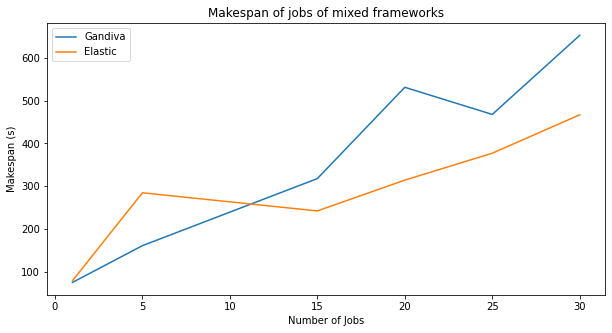

In [9]:
import matplotlib.pyplot as plt

# increase the size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot([1,5,15,20,25,30], gandiva_makespan, label='Gandiva')
plt.plot([1,5,15,20,25,30], elastic_makespan, label='Elastic')
plt.title("Makespan of jobs of mixed frameworks")
plt.xlabel('Number of Jobs')
plt.ylabel('Makespan (s)')
plt.legend()
plt.show()

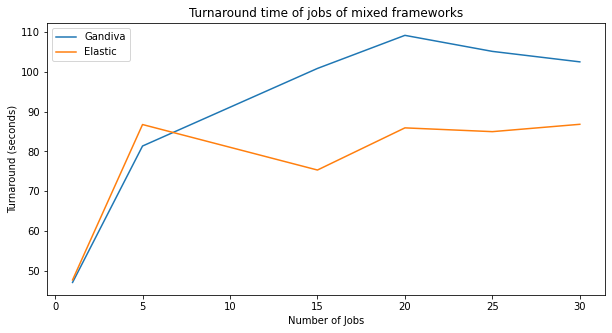

In [8]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot([1, 5, 15, 20, 25, 30], gandiva_turnaround, label='Gandiva')
plt.plot([1, 5, 15, 20, 25, 30], elastic_turnaround, label='Elastic')
plt.xlabel('Number of Jobs')
plt.ylabel('Turnaround (seconds)')
plt.title("Turnaround time of jobs of mixed frameworks")
plt.legend()
plt.show()